augumentation 적용

170508288/170498071 [==============================] - 5s 0us/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
391/391 - 177s - loss: 1.7313 - accuracy: 0.3590 - val_loss: 1.3622 - val_accuracy: 0.5070 - 177s/epoch - 453ms/step
Epoch 2/50
391/391 - 164s - loss: 1.3859 - accuracy: 0.4997 - val_loss: 1.1663 - val_accuracy: 0.5839 - 164s/epoch - 419ms/step
Epoch 3/50
391/391 - 164s - loss: 1.2291 - accuracy: 0.5616 - val_loss: 1.0685 - val_accuracy: 0.6201 - 164s/epoch - 419ms/step
Epoch 4/50
391/391 - 164s - loss: 1.1328 - accuracy: 0.5944 - val_loss: 0.9881 - val_accuracy: 0.6463 - 164s/epoch - 419ms/step
Epoch 5/50
391/391 - 164s - loss: 1.0556 - accuracy: 0.6281 - val_loss: 0.8687 - val_accuracy: 0.6949 - 164s/epoch - 419ms/step
Epoch 6/50
391/391 - 164s - loss: 1.0027 - accuracy: 0.6454 - val_loss: 0.8832 - val_accuracy: 0.6852 - 164s/epoch - 419ms/step
Epoch 7/50
391/391 - 163s - loss: 0.9606 - accuracy: 0.6613 - val_loss: 0.8403 - val_accuracy: 0.7058 - 163s/epoch - 418ms/step
Epoch 8/50
391/391 - 163s - loss: 0.9241 - accuracy: 0.6765 - val_loss: 0.7880 - val_accuracy: 0.7232 - 

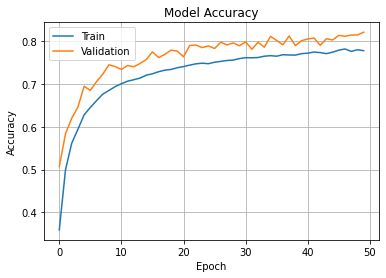

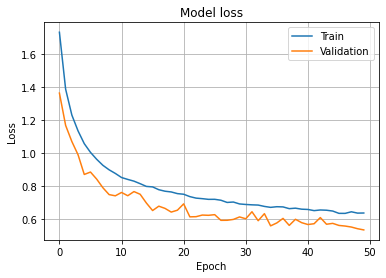

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3), activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3), activation='relu'))
cnn.add(Conv2D(64,(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512, activation ='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation ='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
hist = cnn.fit_generator(generator.flow(x_train, y_train, batch_size=128),epochs=50,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res = cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은", res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

In [2]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

conv2d (3, 3, 3, 32)
conv2d_1 (3, 3, 32, 32)
conv2d_2 (3, 3, 32, 64)
conv2d_3 (3, 3, 64, 64)


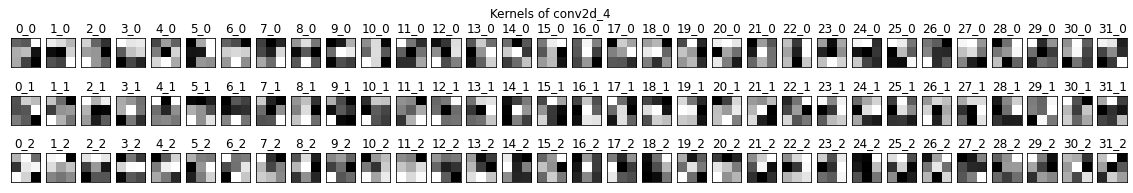

conv2d (None, 30, 30, 32)
conv2d_1 (None, 28, 28, 32)
conv2d_2 (None, 12, 12, 64)
conv2d_3 (None, 10, 10, 64)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


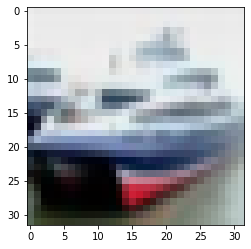

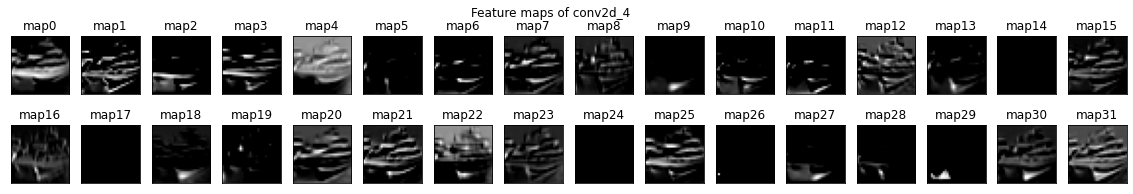

In [3]:
for layer in cnn.layers:
  if 'conv' in layer.name:
    kernel,biases = layer.get_weights()
    print(layer.name, kernel.shape)

kernel, biases = cnn.layers[0].get_weights()
minv, maxv = kernel.min(), kernel.max()
kernel=(kernel-minv)/(maxv-minv)
n_kernel=32

plt.figure(figsize=(20,3))
plt.suptitle("Kernels of conv2d_4")
for i in range(n_kernel):
  f=kernel[:,:,:,i]
  for j in range(3):
    plt.subplot(3, n_kernel, j*n_kernel+i+1)
    plt.imshow(f[:,:,j],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(str(i)+'_'+str(j))
plt.show()

for layer in cnn.layers:
  if 'conv' in layer.name:
    print(layer.name, layer.output.shape)

from tensorflow.keras.models import Model

partial_model=Model(inputs=cnn.inputs, outputs=cnn.layers[0].output)
partial_model.summary()

feature_map = partial_model.predict(x_test)
fm=feature_map[1]

plt.imshow(x_test[1])

plt.figure(figsize=(20,3))
plt.suptitle("Feature maps of conv2d_4")
for i in range(32):
  plt.subplot(2, 16,i+1)
  plt.imshow(fm[:,:,i],cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title("map"+str(i))
plt.show()


In [4]:
cnn.save("my_cnn3.h5")

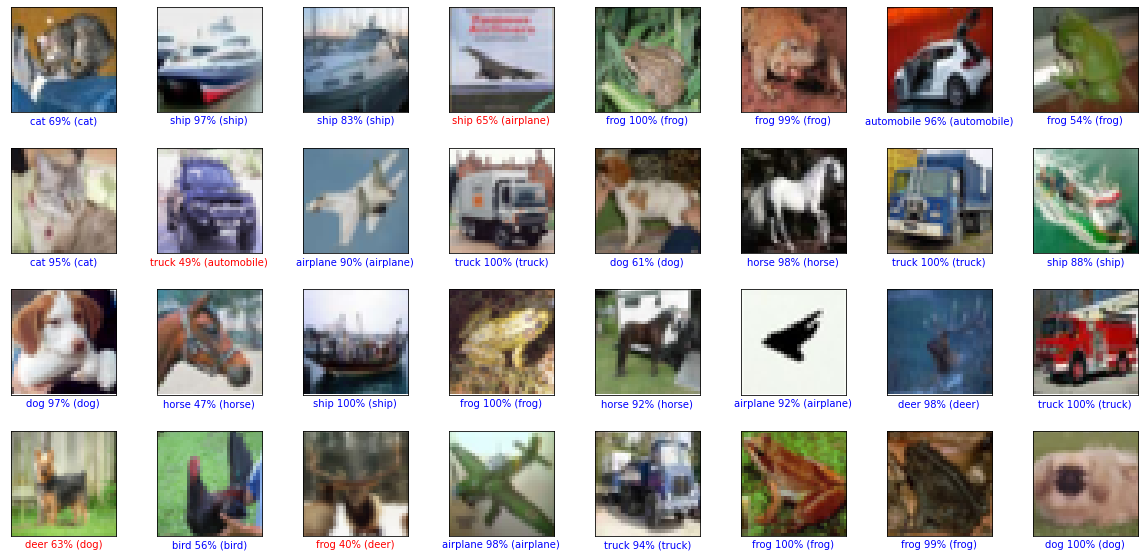

In [9]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"] 
predictions = cnn.predict(x_test)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  true_label=np.argmax(true_label)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

num_rows = 4
num_cols = 8
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(i, predictions[i], y_test, x_test)
plt.tight_layout()
plt.show()